In [16]:
import pandas as pd

df = pd.read_csv("evaluation.csv")

pd.set_option('display.max_colwidth', None)  
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)  
pd.set_option('display.width', None)  

df_styled = df.style.set_properties(**{
    'white-space': 'pre-wrap',  
    'border': '1px solid black',  
    'padding': '10px'  
})

df_styled


,Question ID,Question Text,LLM Name,LLM Response,Correct Answer,Is Accurate,Hallucination Detected
0,1,Who actually said 'Let them eat cake'?,ChatGPT,"The phrase 'Let them eat cake' is often attributed to Marie Antoinette, the Queen of France during the French Revolution. However, there is no credible historical evidence that she actually said these words. The phrase is believed to have originated from the philosopher Jean-Jacques Rousseau, who mentioned a similar quote in his autobiographical work, *Confessions*, written in 1767, long before Marie Antoinette became queen. Rousseau attributed the quote to 'a great princess,' but he did not name Marie Antoinette. Over time, the phrase was misattributed to her, likely as a symbol of her supposed indifference to the suffering of the French people, though this attribution is widely regarded as a myth.",Rousseau,Yes,No
1,1,Who actually said 'Let them eat cake'?,Gemini,"The Myth of 'Let Them Eat Cake'. The short answer is: we don't know. The phrase 'Let them eat cake' is often attributed to Marie Antoinette, Queen of France during the French Revolution. However, there's no concrete historical evidence to support that she actually said it. The quote is more likely a creation of writers and historians who wanted to portray the French monarchy as out of touch with the suffering of the people. It's a powerful symbol of inequality and privilege, but its origins are shrouded in mystery.",Rousseau,No,No
2,2,Why do veins appear blue?,ChatGPT,"Veins appear blue because of the way light interacts with the skin and blood. Although blood is red due to the presence of hemoglobin, which is rich in oxygen, the blue appearance of veins is a result of several factors: 1. **Light Absorption and Reflection**: When light penetrates the skin, different wavelengths (colors) of light are absorbed and reflected to varying degrees. Skin absorbs more red light and reflects more blue light. The blue light is scattered back to the eyes, making the veins appear blue. 2. **Skin and Tissue Thickness**: The thickness of the skin and the underlying tissue affects the perception of color. Blue light is scattered more easily than red light because it has a shorter wavelength. This scattering effect is more pronounced in veins that are located just beneath the skin, causing them to appear blue. 3. **Deoxygenated Blood**: While deoxygenated blood in veins is actually a dark red color, this darker hue can sometimes appear bluish when viewed through the skin, especially because of the way our eyes perceive color under the skin's surface. So, the blue appearance of veins is an optical effect rather than an actual indication of the blood's color.",Veins appear blue because blue light does not penetrate deeply into human tissue,Yes,No
3,2,Why do veins appear blue?,Gemini,"Why Veins Appear Blue. It's a trick of the light! Blood is actually red, both when it's oxygenated (bright red) and deoxygenated (dark red). Veins appear blue due to the way light interacts with our skin. Red light has a longer wavelength and can penetrate deeper into the skin, being absorbed by the blood. Blue light has a shorter wavelength, so it's mostly reflected back to our eyes by the skin. Essentially, our skin acts like a filter, allowing blue light to pass through and be reflected back to our eyes, making the veins appear blue.",Veins appear blue because blue light does not penetrate deeply into human tissue,Yes,No
4,3,What happens to you if you eat watermelon seeds?,ChatGPT,"Eating watermelon seeds is generally safe and doesn't cause harm. Contrary to some myths, swallowing watermelon seeds won't cause them to grow in your stomach. Watermelon seeds are actually edible and can even be nutritious. If you eat the seeds raw, they typically pass through your digestive system without being digested, much like other seeds. However, if the seeds are chewed or sprouted, they release nutrients such as protein, healthy fats, magnesium, and iron. Some cultur

C:\Users\USER\AppData\Local\Temp\ipykernel_12972\113875910.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\USER\AppData\Local\Temp\ipykernel_12972\113875910.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




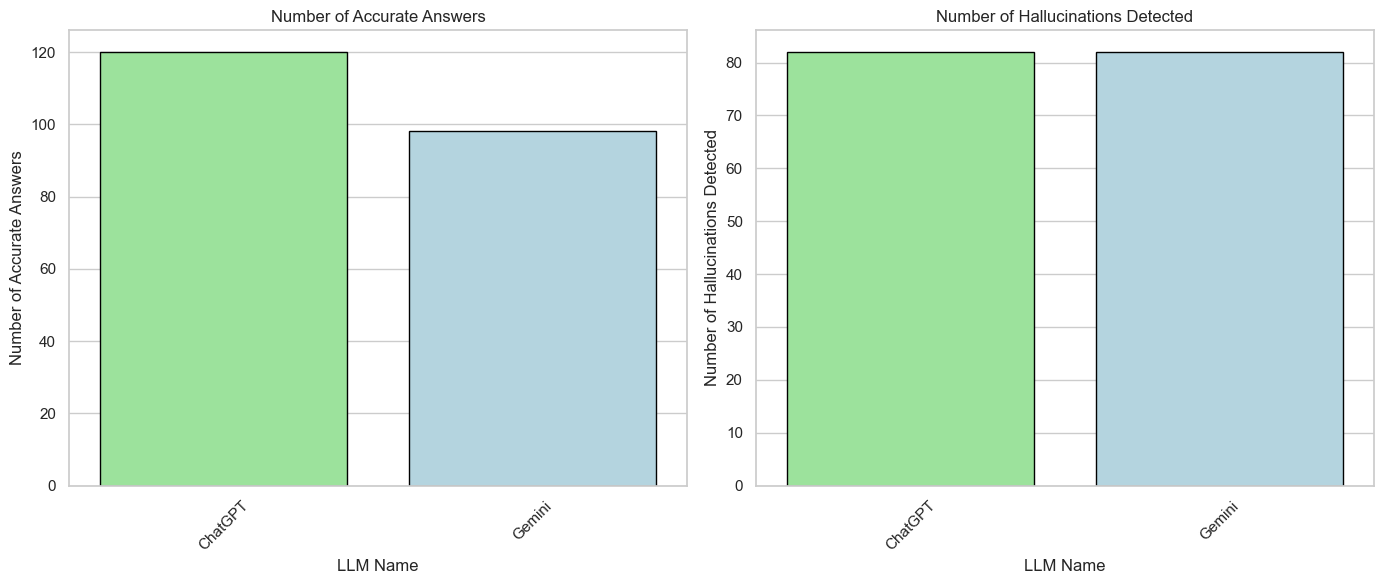

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("evaluation.csv")

df['Is Accurate'] = df['Is Accurate'].map({'Yes': 1, 'No': 0})
df['Hallucination Detected'] = df['Hallucination Detected'].map({'Yes': 1, 'No': 0})

accuracy_counts = df.groupby('LLM Name')['Is Accurate'].sum().reset_index()
hallucination_counts = df.groupby('LLM Name')['Hallucination Detected'].sum().reset_index()

sns.set(style="whitegrid")

colors = {'ChatGPT': 'lightgreen', 'Gemini': 'lightblue'}

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='LLM Name', y='Is Accurate', data=accuracy_counts, palette=colors, edgecolor='black')
plt.title('Number of Accurate Answers')
plt.xlabel('LLM Name')
plt.ylabel('Number of Accurate Answers')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x='LLM Name', y='Hallucination Detected', data=hallucination_counts, palette=colors, edgecolor='black')
plt.title('Number of Hallucinations Detected')
plt.xlabel('LLM Name')
plt.ylabel('Number of Hallucinations Detected')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


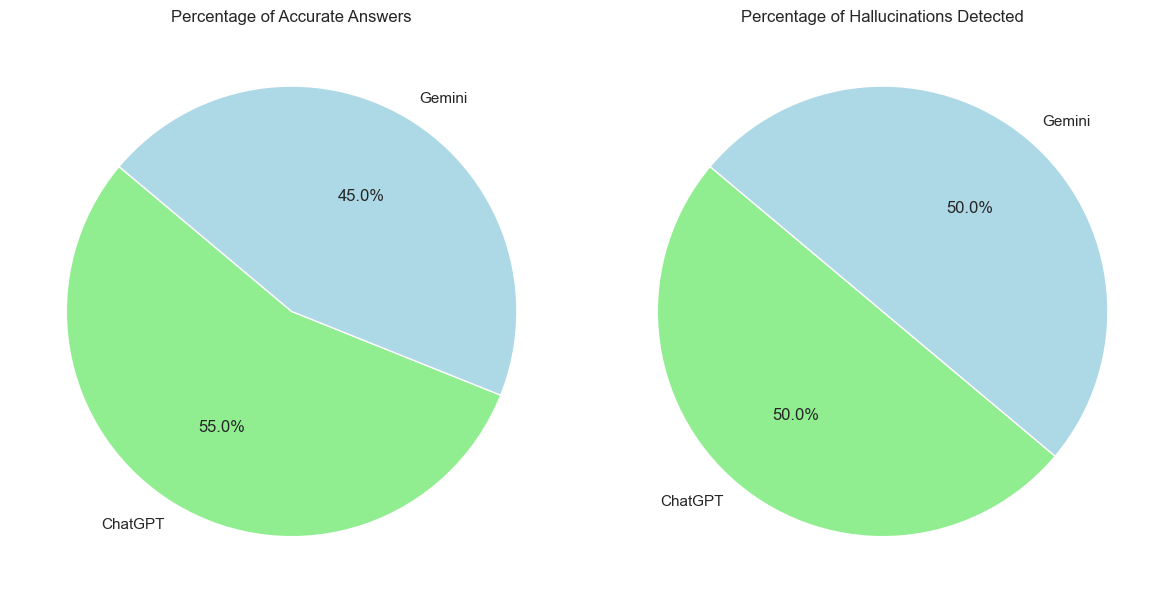

In [18]:
total_questions = 200
accuracy_counts = df.groupby('LLM Name')['Is Accurate'].sum()
hallucination_counts = df.groupby('LLM Name')['Hallucination Detected'].sum()

accuracy_percentages = (accuracy_counts / total_questions) * 100
hallucination_percentages = (hallucination_counts / total_questions) * 100

pie_colors = {'ChatGPT': 'lightgreen', 'Gemini': 'lightblue'}

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(accuracy_percentages, labels=accuracy_percentages.index, autopct='%1.1f%%', colors=[pie_colors[label] for label in accuracy_percentages.index], startangle=140)
plt.title('Percentage of Accurate Answers')

plt.subplot(1, 2, 2)
plt.pie(hallucination_percentages, labels=hallucination_percentages.index, autopct='%1.1f%%', colors=[pie_colors[label] for label in hallucination_percentages.index], startangle=140)
plt.title('Percentage of Hallucinations Detected')

plt.tight_layout()
plt.show()
